In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
sns.set()

In [2]:
data = pd.read_csv("student-mat.csv")

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [6]:
len(categorical_cols)

17

In [7]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

26

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [9]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

26

In [10]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

33
16


In [11]:
data_ohc.shape

(395, 59)

In [12]:
data.shape

(395, 16)

In [13]:
cor = data_ohc.corr()

In [14]:
cor

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,sex_0,sex_1,Pstatus_0,Pstatus_1,famsize_0,famsize_1,address_0,address_1,romantic_0,romantic_1
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,0.028606,-0.028606,-0.029598,0.029598,-0.037847,0.037847,0.146722,-0.146722,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,-0.078228,0.078228,0.123565,-0.123565,0.043068,-0.043068,-0.138804,0.138804,-0.039681,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.034878,0.034878,0.088730,-0.088730,0.058879,-0.058879,-0.072178,0.072178,-0.015602,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,-0.059722,0.059722,-0.028265,0.028265,-0.063493,0.063493,0.328096,-0.328096,-0.021962,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,0.306268,-0.306268,-0.024294,0.024294,0.073595,-0.073595,0.020912,-0.020912,-0.053285,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,-0.044436,0.044436,0.003339,-0.003339,0.015769,-0.015769,0.078578,-0.078578,-0.093137,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.058971,0.058971,-0.025179,0.025179,0.022776,-0.022776,-0.014258,0.014258,0.063816,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.238744,0.238744,-0.038717,0.038717,-0.017695,0.017695,-0.034878,0.034878,0.011182,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,-0.075897,0.075897,-0.003459,0.003459,-0.023064,0.023064,-0.068835,0.068835,-0.007870,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,-0.268171,0.268171,0.030590,-0.030590,-0.101521,0.101521,0.093494,-0.093494,-0.015121,0.015121


In [15]:
threshold = 0.15
a = abs(cor['G3'])
result = a[a>0.15]
result

age         0.161579
Medu        0.217147
Fedu        0.152457
failures    0.360415
G1          0.801468
G2          0.904868
G3          1.000000
higher_0    0.182465
higher_1    0.182465
Name: G3, dtype: float64

In [16]:
df = data_ohc[["age","Medu","Fedu","failures","G1","G2","G3","higher_0","higher_1"]]

In [17]:
df

,age,Medu,Fedu,failures,G1,G2,G3,higher_0,higher_1
0,18,4,4,0,5,6,6,0.0,1.0
1,17,1,1,0,5,5,6,0.0,1.0
2,15,1,1,3,7,8,10,0.0,1.0
3,15,4,2,0,15,14,15,0.0,1.0
4,16,3,3,0,6,10,10,0.0,1.0
...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,9,9,9,0.0,1.0
391,17,3,1,0,14,16,16,0.0,1.0
392,21,1,1,3,10,8,7,0.0,1.0
393,18,3,2,0,11,12,10,0.0,1.0


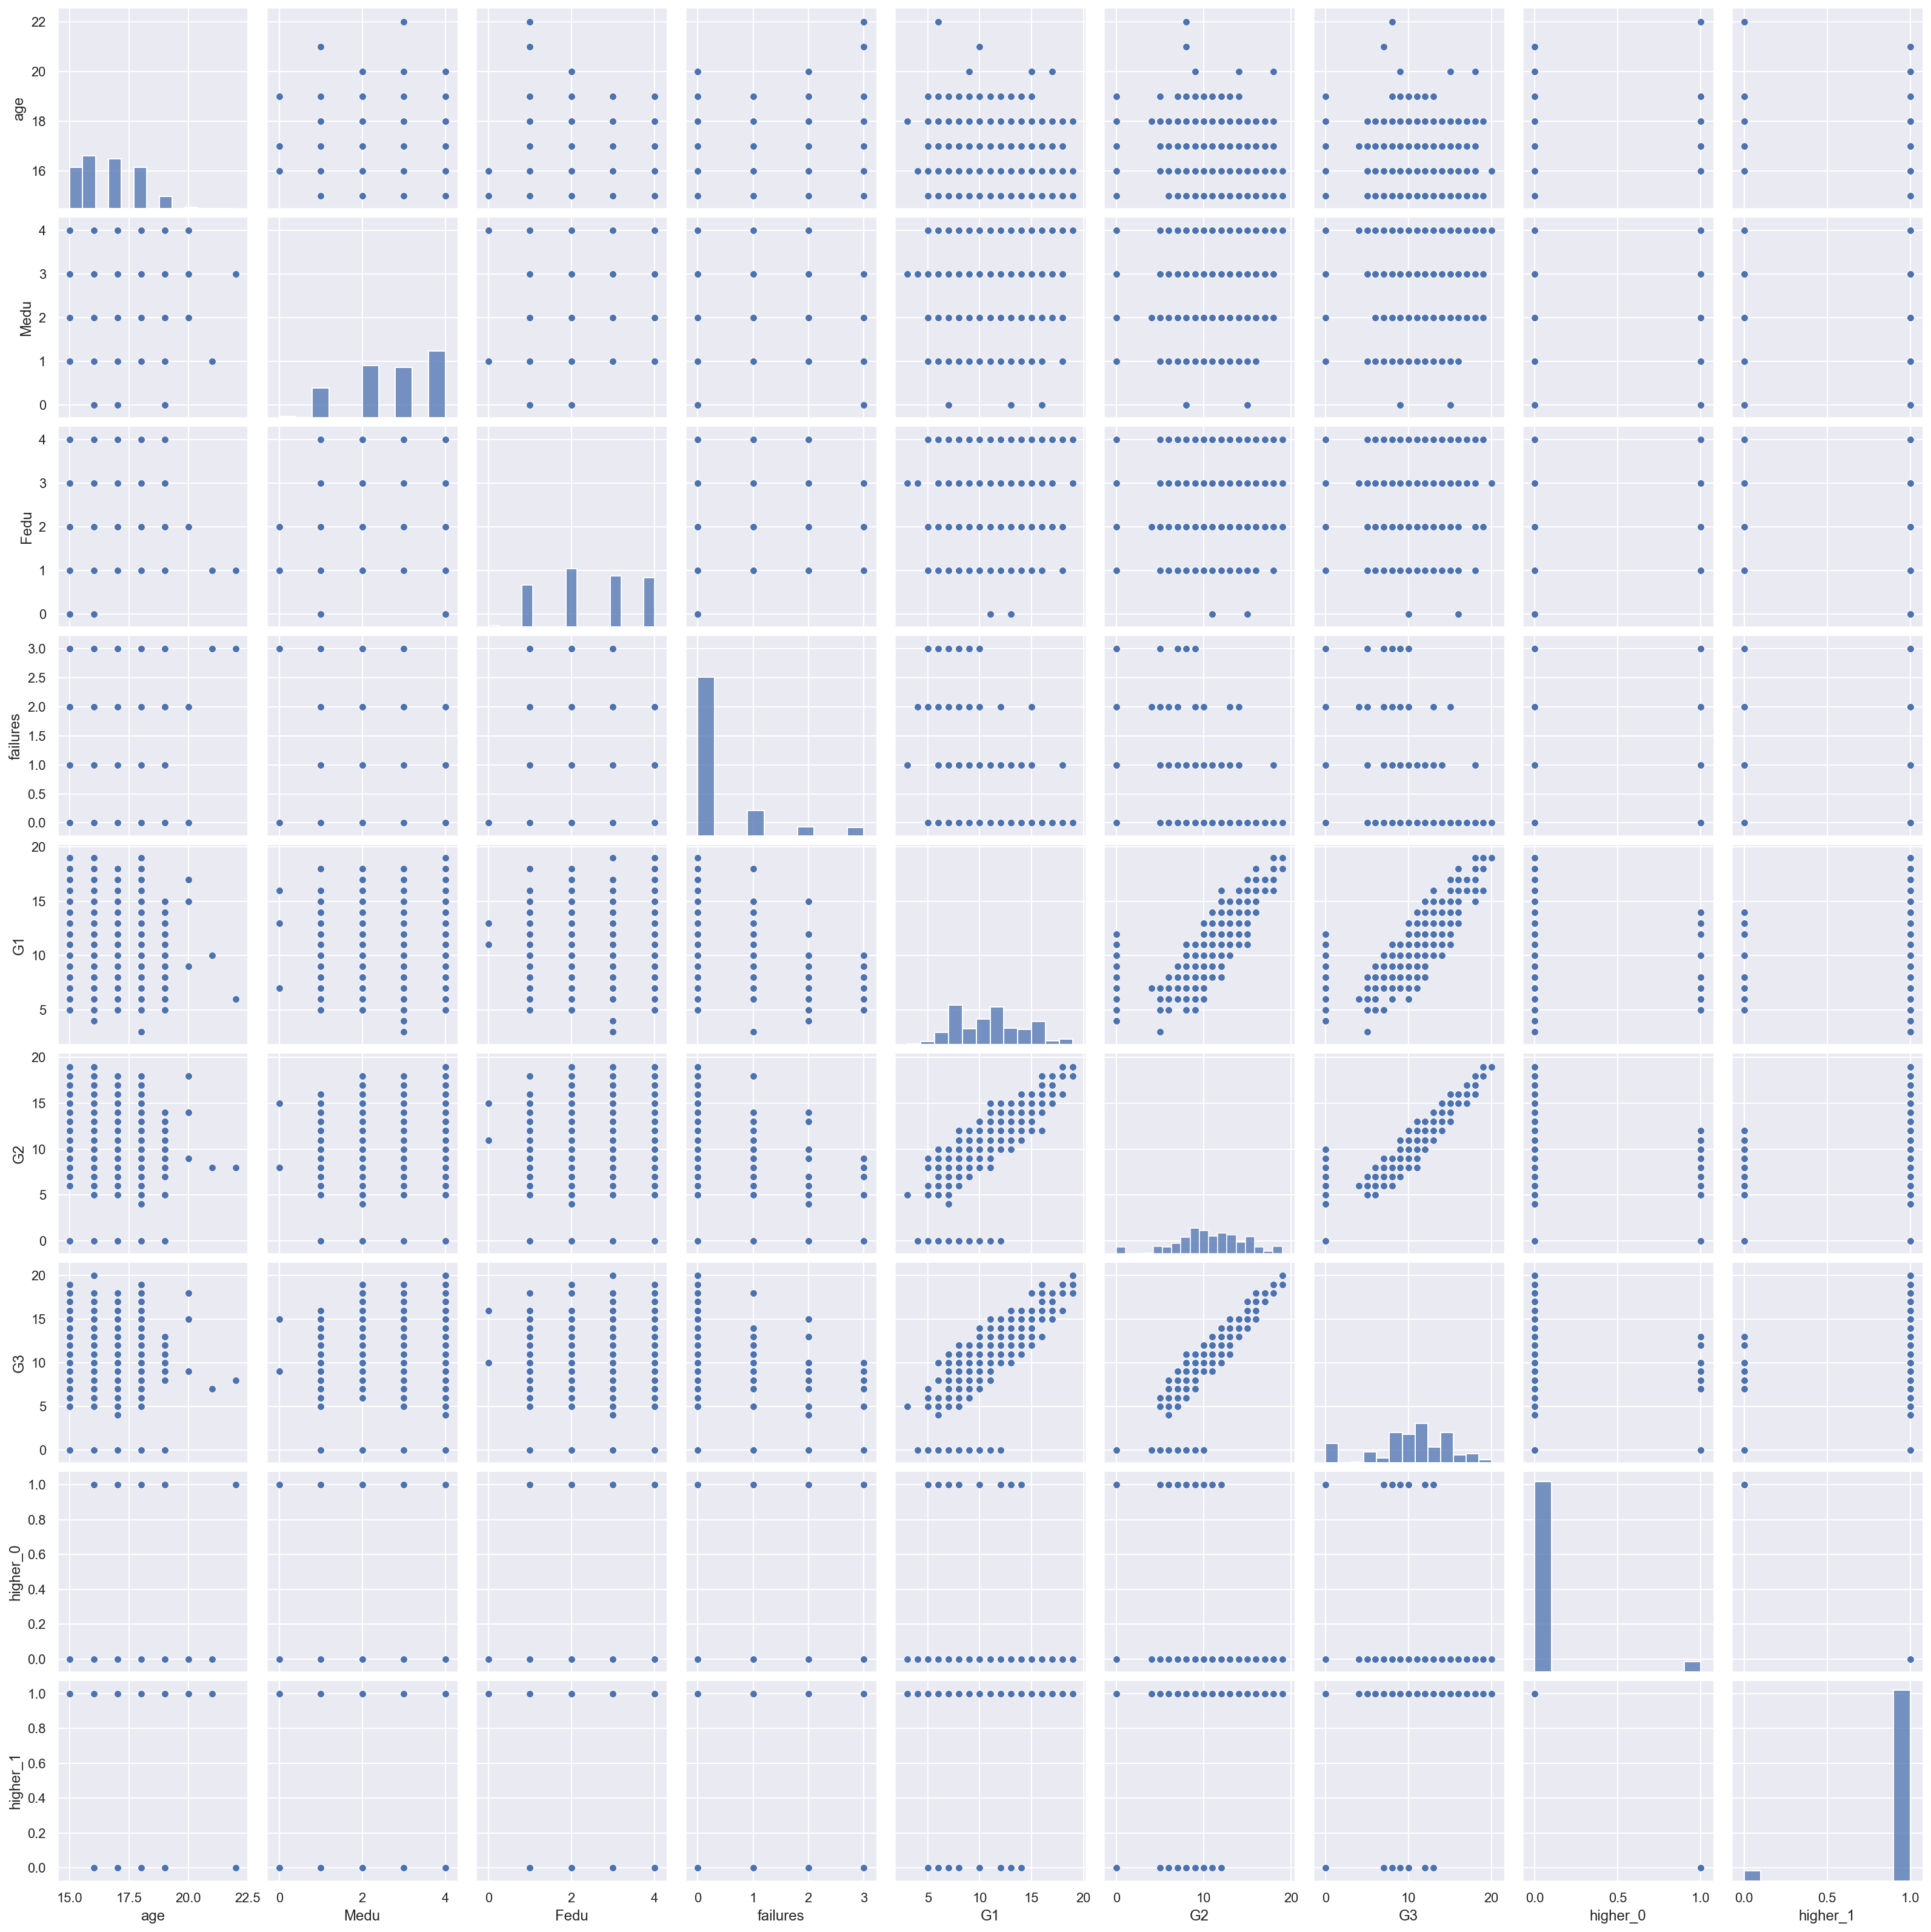

In [18]:
sns.pairplot(df)

In [19]:
df.value_counts()

age  Medu  Fedu  failures  G1  G2  G3  higher_0  higher_1
15   3     2     0         7   6   6   0.0       1.0         2
18   2     3     0         11  10  10  0.0       1.0         2
16   2     1     0         8   9   10  0.0       1.0         2
     3     3     0         11  12  11  0.0       1.0         2
18   2     1     0         15  14  14  0.0       1.0         2
                                                            ..
16   3     2     0         12  13  12  0.0       1.0         1
                           11  9   10  0.0       1.0         1
           1     3         7   7   7   0.0       1.0         1
                 0         13  15  15  0.0       1.0         1
22   3     1     3         6   8   8   1.0       0.0         1
Length: 387, dtype: int64

In [20]:
df.G3.value_counts(),df.G2.value_counts(),df.G1.value_counts()

(10    56
 11    47
 0     38
 15    33
 8     32
 13    31
 12    31
 9     28
 14    27
 16    16
 6     15
 18    12
 7      9
 5      7
 17     6
 19     5
 4      1
 20     1
 Name: G3, dtype: int64, 9     50
 10    46
 12    41
 13    37
 11    35
 15    34
 8     32
 14    23
 7     21
 5     15
 6     14
 16    13
 0     13
 18    12
 17     5
 19     3
 4      1
 Name: G2, dtype: int64, 10    51
 8     41
 11    39
 7     37
 12    35
 13    33
 9     31
 14    30
 6     24
 15    24
 16    22
 17     8
 18     8
 5      7
 19     3
 4      1
 3      1
 Name: G1, dtype: int64)

In [21]:
X = df.drop("G3", axis = 1)
y = df["G3"]

In [22]:
X

,age,Medu,Fedu,failures,G1,G2,higher_0,higher_1
0,18,4,4,0,5,6,0.0,1.0
1,17,1,1,0,5,5,0.0,1.0
2,15,1,1,3,7,8,0.0,1.0
3,15,4,2,0,15,14,0.0,1.0
4,16,3,3,0,6,10,0.0,1.0
...,...,...,...,...,...,...,...,...
390,20,2,2,2,9,9,0.0,1.0
391,17,3,1,0,14,16,0.0,1.0
392,21,1,1,3,10,8,0.0,1.0
393,18,3,2,0,11,12,0.0,1.0


In [23]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

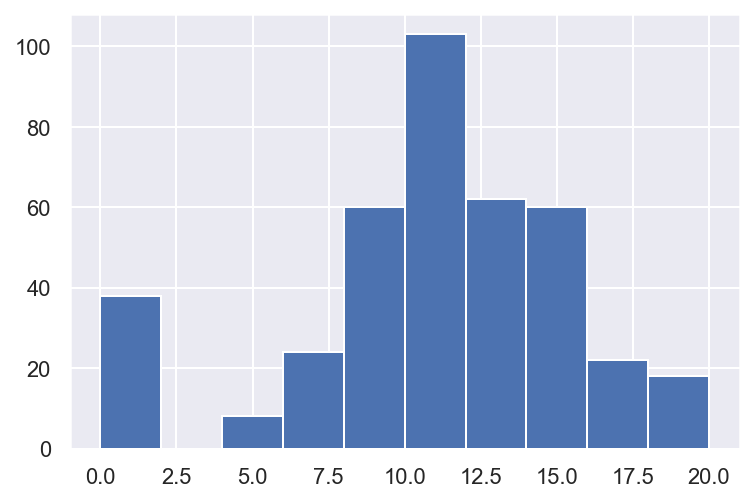

In [24]:
y.hist();

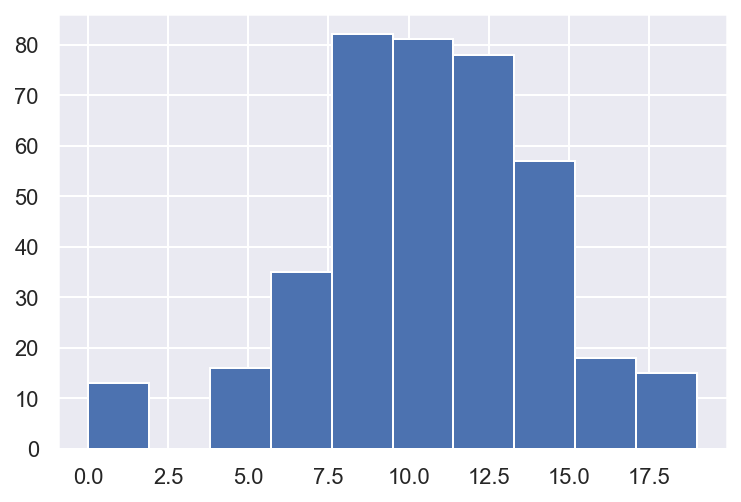

In [25]:
X.G2.hist();

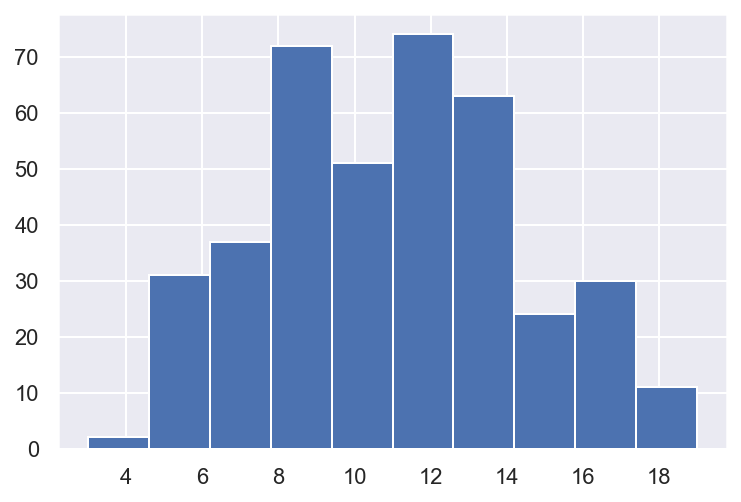

In [26]:
X.G1.hist();

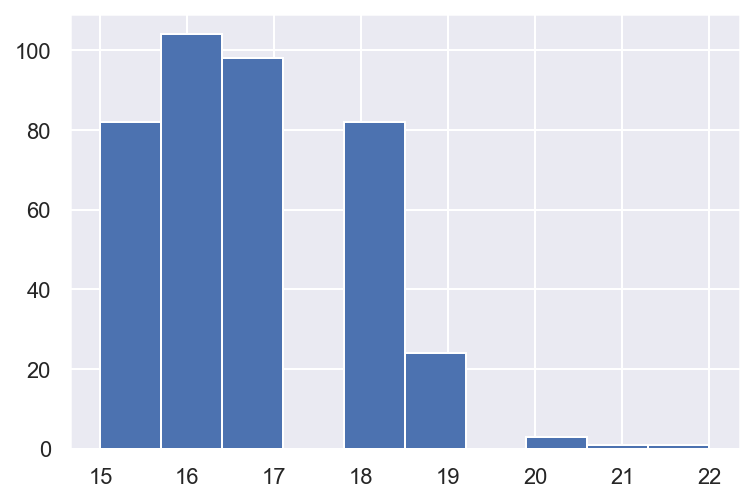

In [27]:
X.age.hist();

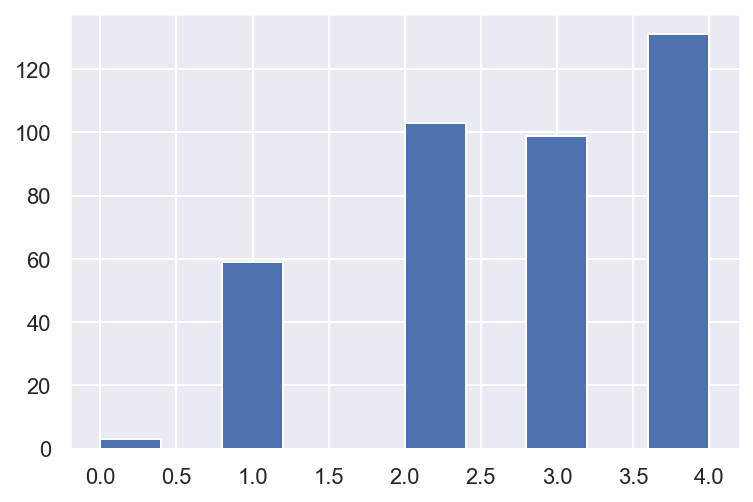

In [28]:
X.Medu.hist();

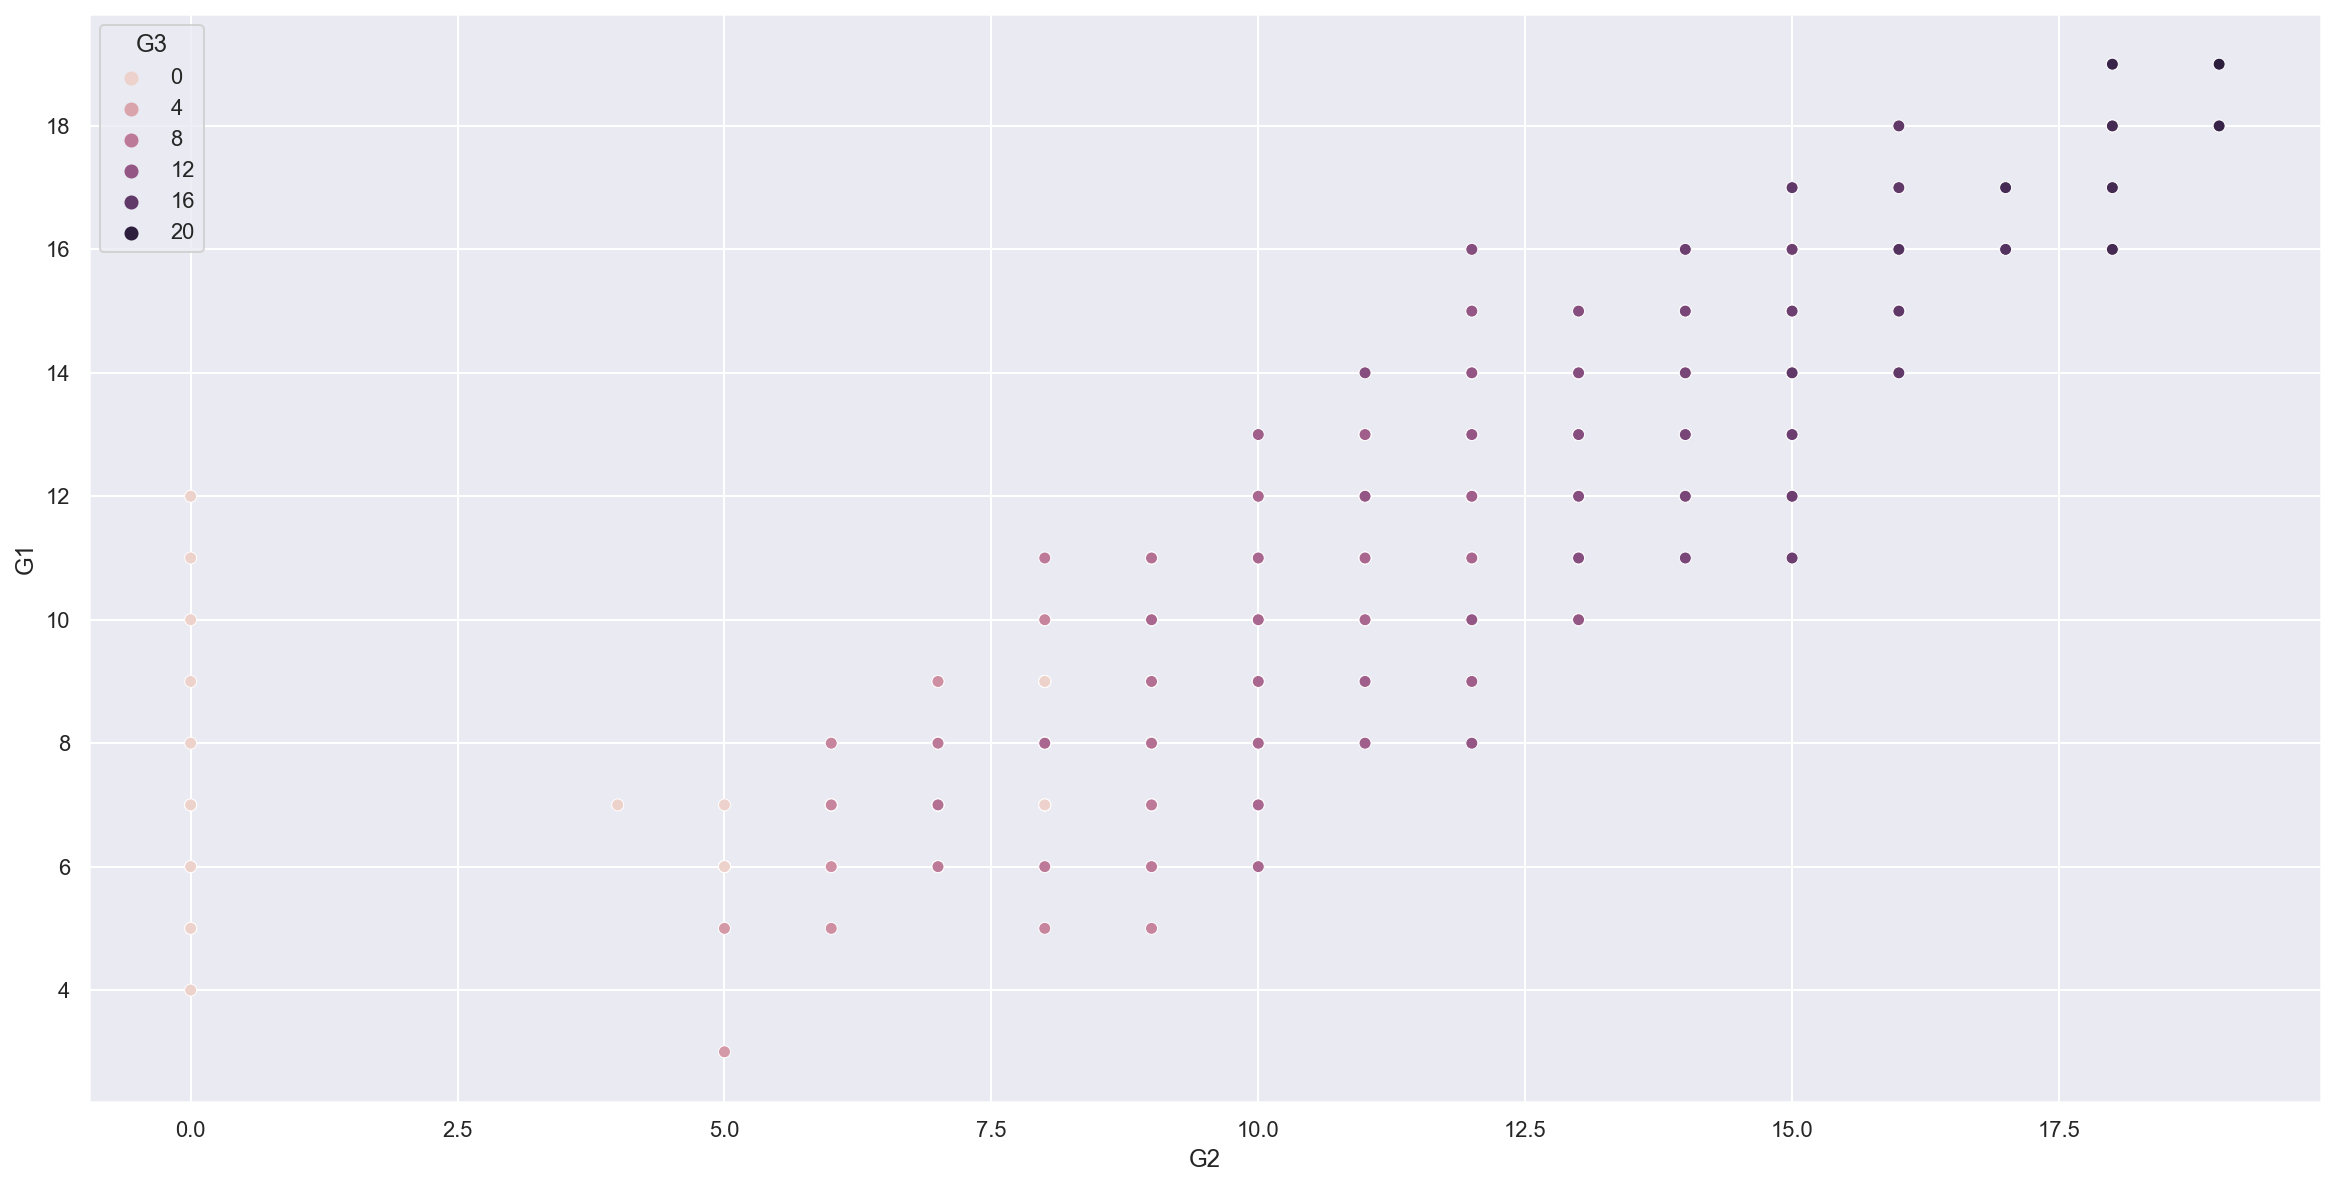

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = "G2", y = "G1", hue = "G3", data = df);

In [252]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25)

In [254]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}


In [255]:
X_train.shape, y_train.shape

((296, 8), (296,))

# Training the model without Scaling

In [256]:
lr = LinearRegression()

In [257]:
lr.fit(X_train,y_train)
predict = lr.predict(X_test)

In [258]:
mse = mean_squared_error(y_test,predict)

In [259]:
mse

1.6945561387687091

In [260]:
r2 = r2_score(y_test,predict)

In [261]:
r2

0.9211109937107077

In [216]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

In [67]:
pf = PolynomialFeatures(degree = 2)

In [68]:
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.8038716773917949,
 0.7827435130282274,
 0.8269320368248261,
 0.8413594510275679,
 0.8244078769868335]

# Training the model with scaling

In [69]:
s = StandardScaler()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [70]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [71]:
r2_score(y, predictions)

0.8167611852249199

In [72]:
np.mean(scores) 

0.8158629110518498

In [140]:
alphas = np.geomspace(1e-9, 1e0, num=20)
alphas

array([1.00000000e-09, 2.97635144e-09, 8.85866790e-09, 2.63665090e-08,
       7.84759970e-08, 2.33572147e-07, 6.95192796e-07, 2.06913808e-06,
       6.15848211e-06, 1.83298071e-05, 5.45559478e-05, 1.62377674e-04,
       4.83293024e-04, 1.43844989e-03, 4.28133240e-03, 1.27427499e-02,
       3.79269019e-02, 1.12883789e-01, 3.35981829e-01, 1.00000000e+00])

In [141]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [142]:
list(zip(alphas,scores))

[(1e-09, 0.8167611852481327),
 (2.9763514416313133e-09, 0.8167611852929528),
 (8.858667904100832e-09, 0.816761185432172),
 (2.6366508987303555e-08, 0.8167611858400317),
 (7.847599703514607e-08, 0.8167611870222786),
 (2.3357214690901212e-07, 0.8167611904480977),
 (6.951927961775605e-07, 0.8167612005576008),
 (2.06913808111479e-06, 0.8167612319815415),
 (6.158482110660255e-06, 0.8167613299070187),
 (1.8329807108324338e-05, 0.8167616248937768),
 (5.4555947811685143e-05, 0.8167624287983417),
 (0.0001623776739188721, 0.8167648184688074),
 (0.0004832930238571752, 0.8167722162429085),
 (0.0014384498882876629, 0.8167905740866979),
 (0.004281332398719387, 0.8168429013784437),
 (0.012742749857031322, 0.8169390653899424),
 (0.03792690190732246, 0.8170230310224594),
 (0.11288378916846883, 0.8179064091267134),
 (0.33598182862837744, 0.8153377034654425),
 (1.0, 0.7696222247882796)]

In [143]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([-1.18156568e-01,  1.25868509e-01, -1.35388398e-01, -1.85013279e-01,
        1.59237035e-01,  9.61040614e-01, -1.08383333e-01,  1.71369610e-16])

In [144]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.        ,  0.        ,  0.        , -0.        ,  0.07107739,
        0.97781177, -0.        ,  0.        ])

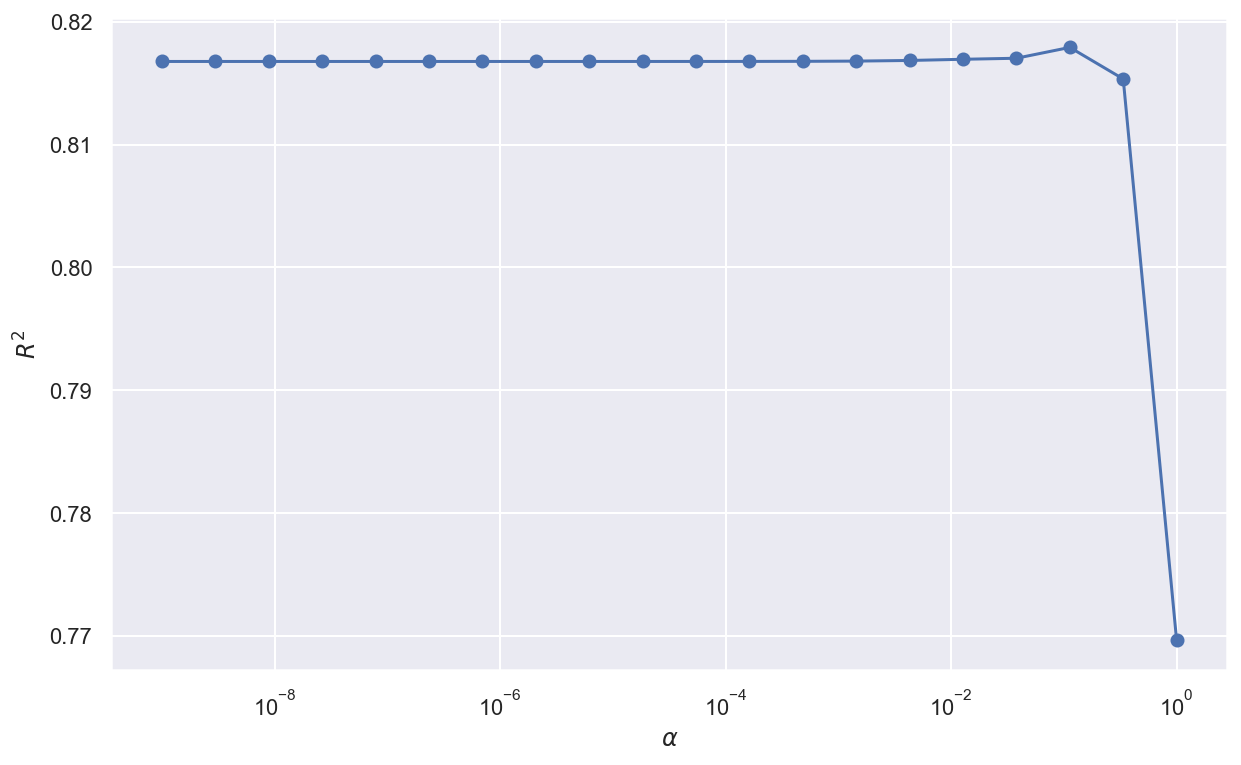

In [145]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [146]:
pf = PolynomialFeatures(degree=1)

scores = []
alphas = np.geomspace(0.0006, 0.006, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

In [147]:
alphas = np.geomspace(0.0006, 0.006, 20)
alphas

array([0.0006    , 0.0006773 , 0.00076456, 0.00086307, 0.00097427,
       0.00109979, 0.00124148, 0.00140143, 0.00158199, 0.00178581,
       0.00201589, 0.00227561, 0.0025688 , 0.00289976, 0.00327336,
       0.00369509, 0.00417116, 0.00470856, 0.0053152 , 0.006     ])

In [148]:
list(zip(alphas,scores))

[(0.0005999999999999997, 0.8167739097433037),
 (0.0006773027350108133, 0.8167754696066007),
 (0.0007645649914218797, 0.8167772247084607),
 (0.0008630699329725973, 0.816779198631156),
 (0.0009742660435132331, 0.8167814175641299),
 (0.0010997884264994607, 0.8167839105466449),
 (0.0012414828486688734, 0.8167867096797174),
 (0.0014014328814540736, 0.8167898501921743),
 (0.0015819905392382141, 0.8167933707854457),
 (0.0017858108649787905, 0.8167973136986793),
 (0.0020158909717702695, 0.8168017247672477),
 (0.0022756141144393486, 0.8168066533798267),
 (0.002568799439231636, 0.8168121522903737),
 (0.0028997581431430526, 0.8168182772303145),
 (0.0032733568687011104, 0.8168250862471415),
 (0.0036950892663961585, 0.8168326386687346),
 (0.004171156777065366, 0.8168409935883688),
 (0.004708559822108771, 0.8168502075775089),
 (0.005315200742460502, 0.8168603316392067),
 (0.006000000000000003, 0.8168714071206663)]

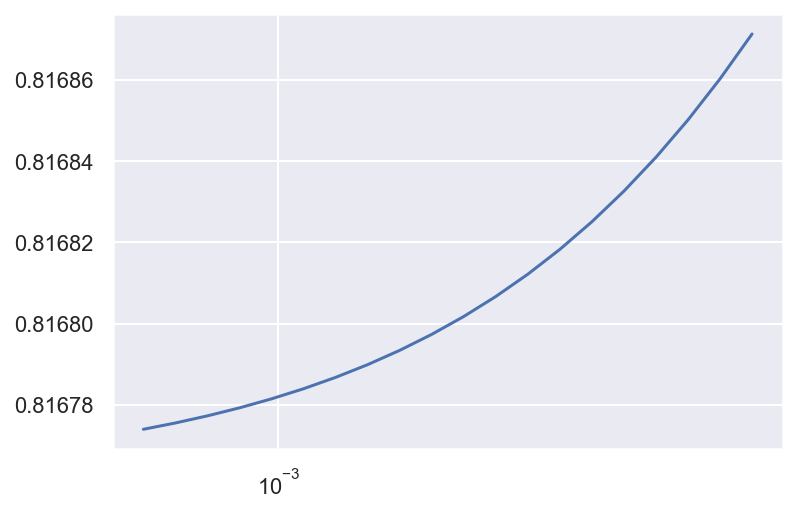

In [149]:
plt.semilogx(alphas, scores);

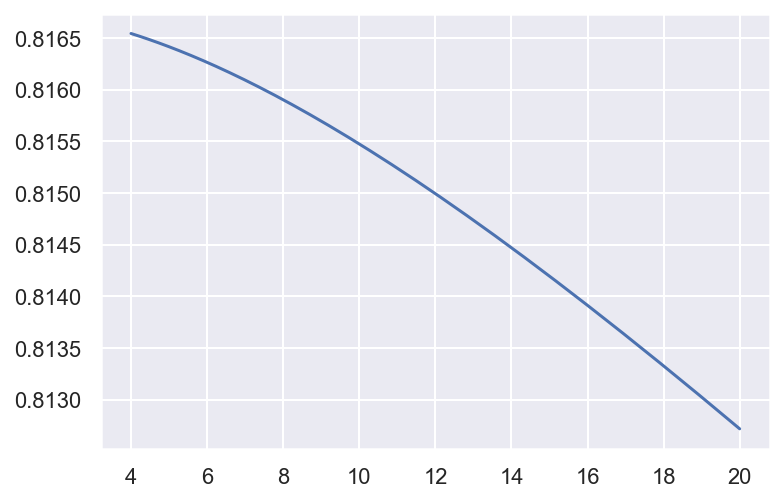

In [157]:
pf = PolynomialFeatures(degree=1)
alphas = np.geomspace(4, 20, 30)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [158]:
list(zip(alphas,scores))

[(4.0, 0.816543772754162),
 (4.228267015769416, 0.8165167167857197),
 (4.4695604891609, 0.8164866858502577),
 (4.724623797826311, 0.8164533866684722),
 (4.994242741567055, 0.8164165011145457),
 (5.279247963228449, 0.8163756846646388),
 (5.58051750774668, 0.8163305648252275),
 (5.898979527232258, 0.8162807395524705),
 (6.235615140423803, 0.8162257756751229),
 (6.591461455321584, 0.816165207334721),
 (6.9676147643129305, 0.8160985344578021),
 (7.365233921633089, 0.8160252212756912),
 (7.785543913566802, 0.8159446949078116),
 (8.229839632389709, 0.815856344024458),
 (8.699489865676323, 0.8157595176043964),
 (9.195941513264877, 0.815653523801436),
 (9.720724044870641, 0.8155376289321182),
 (10.275454212080797, 0.8154110565938149),
 (10.861841029247536, 0.8152729869186873),
 (11.481691038624568, 0.8151225559640923),
 (12.136913875967887, 0.8149588552340253),
 (12.82952815374728, 0.8147809313190807),
 (13.561667680093686, 0.8145877856341629),
 (14.335588032641558, 0.8143783742238728),
 (15.1

In [183]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(2, 30, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [184]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 2.        ,  2.19575999,  2.41068096,  2.6466384 ,  2.90569134,
        3.19010039,  3.5023474 ,  3.84515714,  4.22152109,  4.63472355,
        5.08837026,  5.58641991,  6.13321865,  6.73353805,  7.39261671,
        8.11620599,  8.91062017,  9.78279162, 10.74033119, 11.79159474,
       12.94575595, 14.21288646, 15.60404369, 17.13136739, 18.80818551,
       20.64913058, 22.67026735, 24.88923296, 27.32539092, 30.        ])})

In [185]:
grid.best_score_, grid.best_params_

(0.8077423180100368,
 {'polynomial_features__degree': 1,
  'ridge_regression__alpha': 2.90569134421458})

In [186]:
y_predict = grid.predict(X)

In [187]:
r2_score(y, y_predict)

0.824234444287388

In [164]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        , -0.14263169,  0.17302796, -0.12563665, -0.02144658,
        0.62874617,  3.56334448,  0.00585672, -0.00585672])

In [165]:
grid.cv_results_

{'mean_fit_time': array([0.01235433, 0.00813971, 0.00848041, 0.00604086, 0.0056458 ,
        0.00714984, 0.00841804, 0.00264883, 0.00320005, 0.00230708,
        0.00707364, 0.00387306, 0.00649281, 0.00800066, 0.00189028,
        0.        , 0.00088053, 0.00865064, 0.00320001, 0.0023169 ,
        0.00732403, 0.00605474, 0.0033443 , 0.00708275, 0.00371399,
        0.00699368, 0.00856752, 0.00411944, 0.00566916, 0.00579033,
        0.01120877, 0.01525803, 0.0129457 , 0.01877542, 0.01736851,
        0.01848454, 0.01847959, 0.01959867, 0.01899056, 0.0186223 ,
        0.01806445, 0.01135273, 0.01279168, 0.01742215, 0.01831613,
        0.01690826, 0.01764135, 0.01494169, 0.0175312 , 0.01785836,
        0.01677108, 0.01673303, 0.01271138, 0.01816759, 0.01471748,
        0.01719289, 0.01862688, 0.01537991, 0.00794883, 0.0130744 ,
        0.01259289, 0.00696573, 0.00667133, 0.00648565, 0.00712576,
        0.00724945, 0.00734634, 0.00761905, 0.00701795, 0.00641246,
        0.00718036, 0.00791183,

In [166]:

from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1,0.001,0.4,0.5, 0.3, 1,2, 3,4, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=kf).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridge_r2 = r2_score(y_test, ridgeCV.predict(X_test))
print(ridgeCV.alpha_, ridgeCV_rmse, ridge_r2)

80.0 1.8640803793480412 0.8243065030280352


In [167]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5,0.0002,0.0003,0.0004,0.000002 ,0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lasso_r2 = r2_score(y_test, lassoCV.predict(X_test))
print(lassoCV.alpha_, lassoCV_rmse, lasso_r2)  # Lasso is slower

0.0005 1.8634937658899795 0.8244170647335942


In [168]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 8 coefficients, 8 are non-zero with Lasso.


In [169]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNet_r2 = r2_score(y_test, elasticNetCV.predict(X_test))
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse, elasticNet_r2)

0.0005 0.9 1.8634988226647935 0.8244161118089471


In [170]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_r2 = r2_score(y_test, linearRegression.predict(X_test))
print(linearRegression_rmse, linearRegression_r2)

1.8635425208695386 0.8244078769868335


C:\Users\bhara_5sejtsc\ML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bhara_5sejtsc\ML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


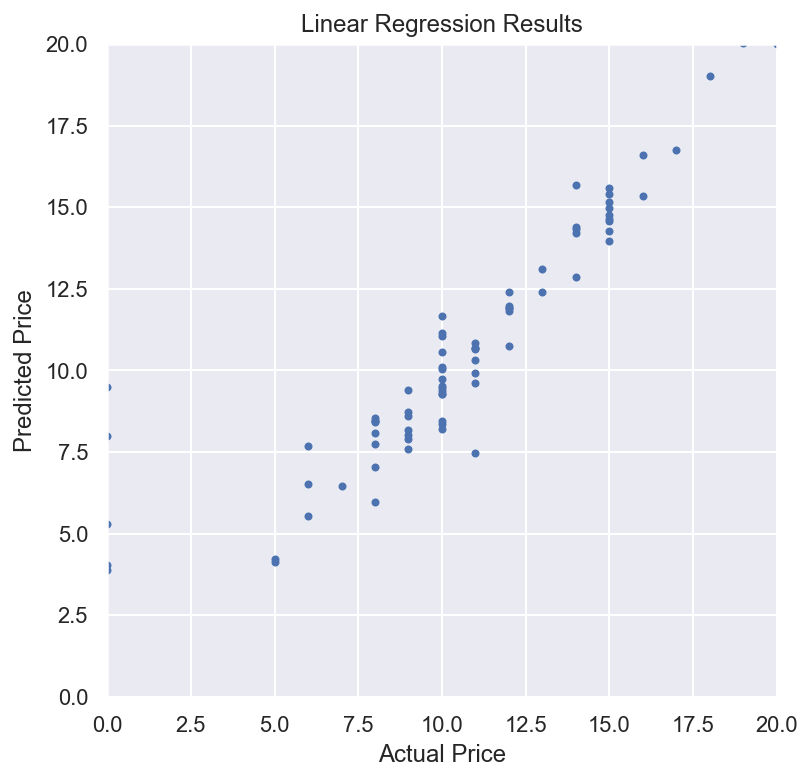

In [171]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [172]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,1.863543
Ridge,1.864080
Lasso,1.863494
ElasticNet,1.863499


C:\Users\bhara_5sejtsc\ML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bhara_5sejtsc\ML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\bhara_5sejtsc\ML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bhara_5sejtsc\ML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will 

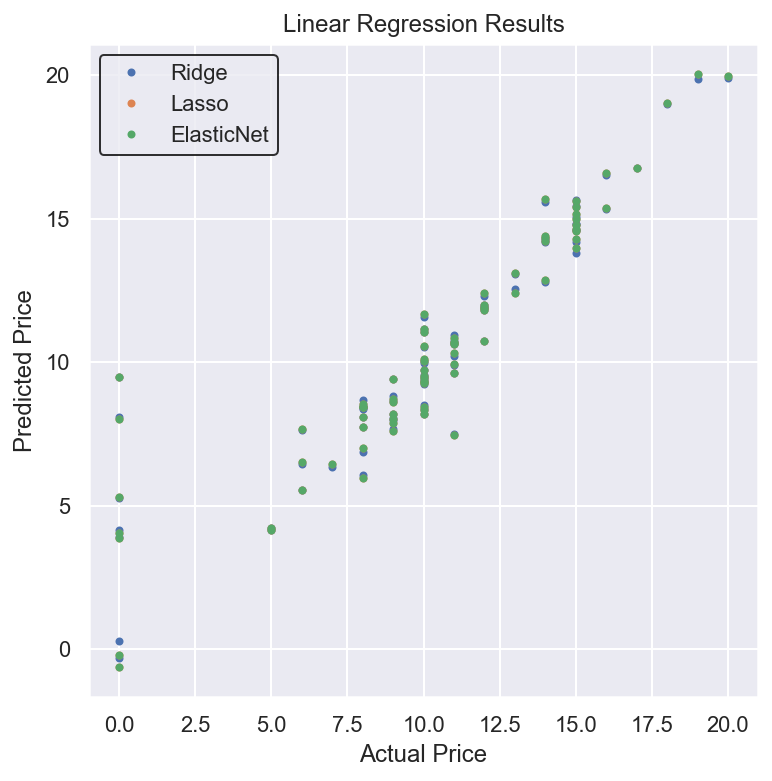

In [173]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

In [174]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,1.863543,15611.371658
Ridge,1.864080,958674.985764
Lasso,1.863494,9166.717567
ElasticNet,1.863499,382.248884


In [175]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

C:\Users\bhara_5sejtsc\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\bhara_5sejtsc\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\bhara_5sejtsc\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\bhara_5sejtsc\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,1.863543,15611.371658,5.173933
Ridge,1.864080,958674.985764,5.249048
Lasso,1.863494,9166.717567,5.173965
ElasticNet,1.863499,382.248884,5.173822


In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,1.863543,15611.371658,5.173933,1.918600
Ridge,1.864080,958674.985764,5.249048,4.459249
Lasso,1.863494,9166.717567,5.173965,1.920564
ElasticNet,1.863499,382.248884,5.173822,1.918667


In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,1.863543,15611.371658,5.173933,1.920165
Ridge,1.864080,958674.985764,5.249048,4.460030
Lasso,1.863494,9166.717567,5.173965,1.920811
ElasticNet,1.863499,382.248884,5.173822,1.919001
